# Name : Yashesh Kumar Tiwari¶

# Group No: 316

# Dataset : heart-disease-uci

In [38]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.express as px
sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
# a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# b.	Print the description 
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [5]:
#b.	Print the shape of the dataset
df.shape

(303, 14)

# Data Visualization

<AxesSubplot:>

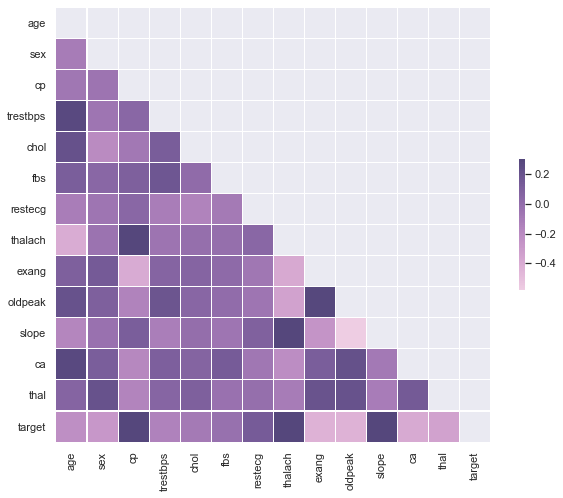

In [7]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 8))

cmap = sns.color_palette("ch:s=-.2,r=.3", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .3})

------------------------------------------------------------------------------------------------------------------------------------------------------
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


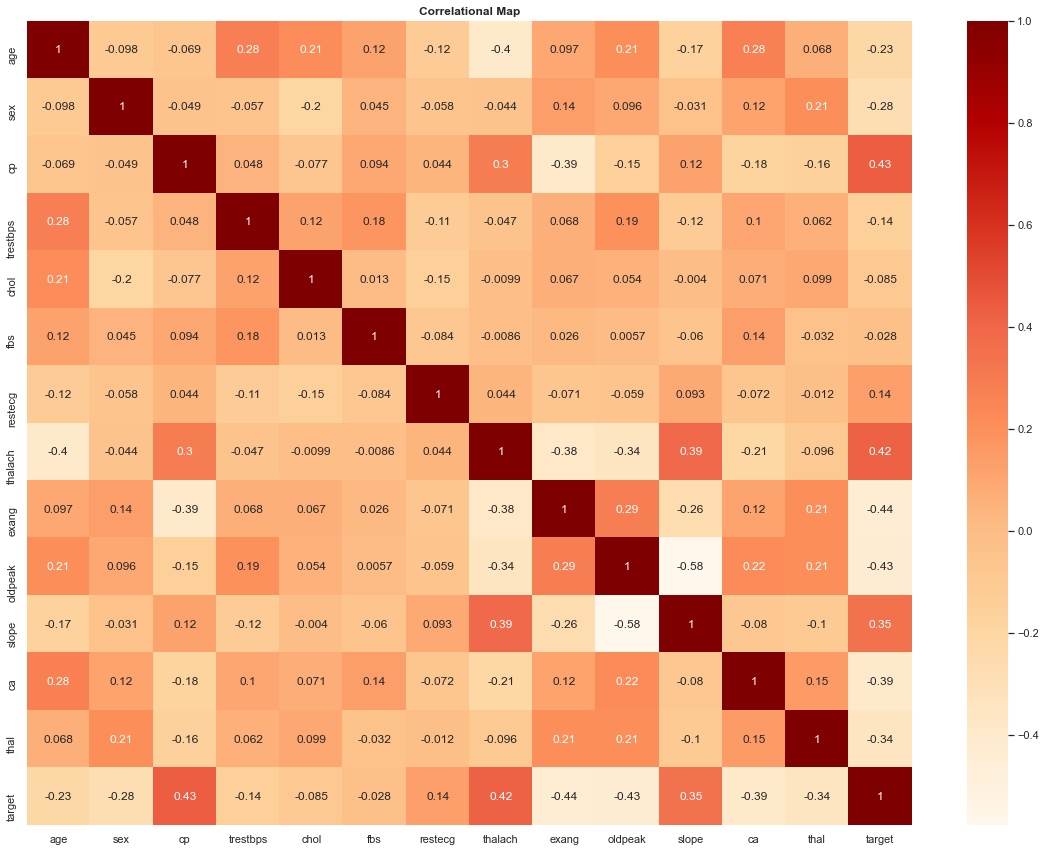

In [9]:
#Correlation

def find_correlational_map(data):
    plt.figure(figsize=(16,12))
    sns.heatmap(data.corr(), annot=True, cmap='OrRd')
    plt.title('Correlational Map', weight='bold')
    print('---'*50)
    print(data.corr().target.sort_values(ascending = False))
    plt.tight_layout()
    
find_correlational_map(df)

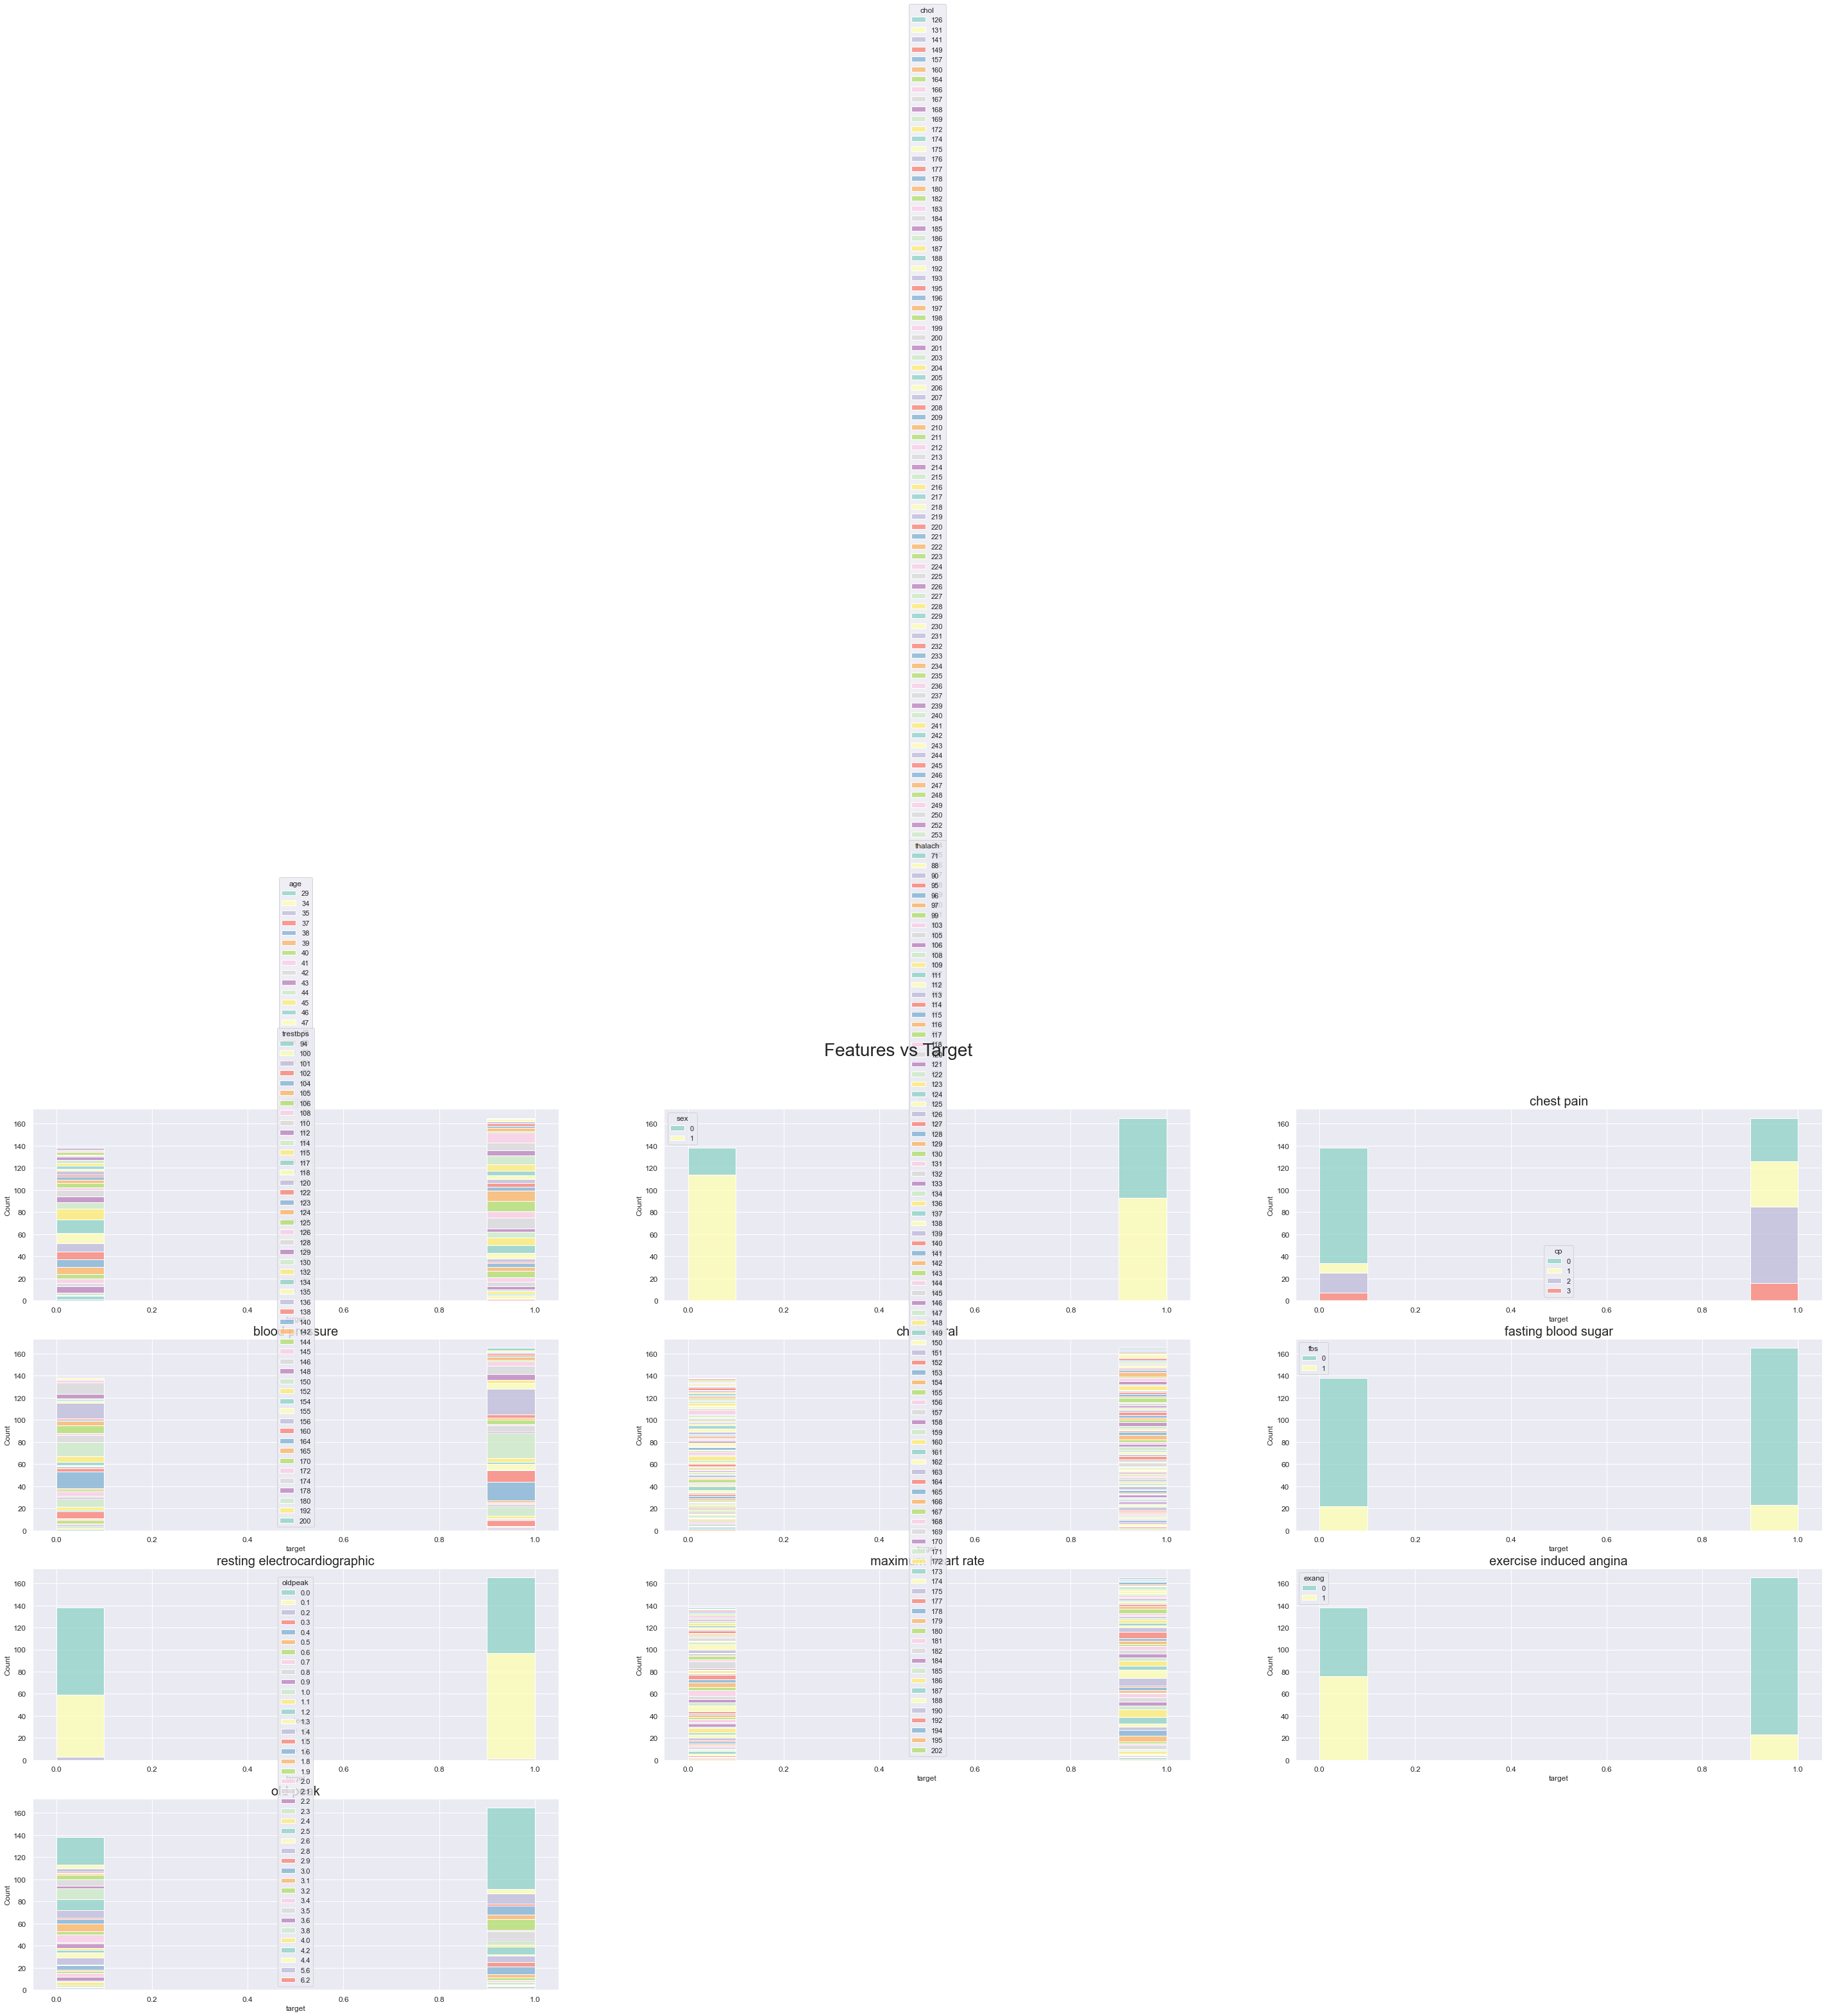

In [12]:
fig = plt.figure(figsize=(50,24))

gs = fig.add_gridspec(4,3)

ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1])
ax12 = fig.add_subplot(gs[1,2])
ax20 = fig.add_subplot(gs[2,0])
ax21 = fig.add_subplot(gs[2,1])
ax22 = fig.add_subplot(gs[2,2])
ax30 = fig.add_subplot(gs[3,0])


ax00.set_title('age', fontsize=20)
ax01.set_title('sex', fontsize=20)
ax02.set_title('chest pain', fontsize=20)
ax10.set_title('blood pressure', fontsize=20)
ax11.set_title('cholestoral', fontsize=20)
ax12.set_title('fasting blood sugar', fontsize=20)
ax20.set_title('resting electrocardiographic', fontsize=20)
ax21.set_title('maximum heart rate', fontsize=20)
ax22.set_title('exercise induced angina', fontsize=20)

ax30.set_title('old peak', fontsize=20)

ax00.tick_params(labelsize=12)
ax01.tick_params(labelsize=12)
ax02.tick_params(labelsize=12)
ax10.tick_params(labelsize=12)
ax11.tick_params(labelsize=12)
ax12.tick_params(labelsize=12)
ax20.tick_params(labelsize=12)
ax21.tick_params(labelsize=12)
ax22.tick_params(labelsize=12)
ax30.tick_params(labelsize=12)

sns.histplot(data = df,x="target", kde=False, ax =ax00, hue="age", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax01, hue="sex", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax02, hue="cp", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax10, hue="trestbps", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax11, hue="chol", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax12, hue="fbs", palette="Set3", multiple="stack")

sns.histplot(data = df,x="target", kde=False, ax =ax20, hue="restecg", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax21, hue="thalach", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax22, hue="exang", palette="Set3", multiple="stack")
sns.histplot(data = df,x="target", kde=False, ax =ax30, hue="oldpeak", palette="Set3", multiple="stack")

fig.subplots_adjust(top=0.92)
fig.suptitle('Features vs Target', fontsize="28");

# EDA (Exploratory Data Analysis)

In [14]:
# check for how many womens are prone to heart-attack
women_stroke = df.loc[df.sex == 0]['target']
women_stroke_percentage = sum(women_stroke)/len(women_stroke)
print('The % of womens prone to heart-attack: {}%'.format(women_stroke_percentage*100))

The % of womens prone to heart-attack: 75.0%


In [15]:
women = df[df['sex']==0]
men = df[df['sex']==1]

Check for the following relationship;

cp<br/>
trtbps<br/>
chol<br/>
restecg<br/>
thalachh<br/>
oldpeak<br/>

In [26]:
def cp_density(women, men):
    plt.figure(figsize=(16,6))
    sns.kdeplot(women['cp'], label = 'Women cp values', shade = True, color='red')
    sns.kdeplot(men['cp'], label = 'men cp values', shade = True, color = 'blue')
    plt.legend()
    plt.title('Cp values comparision', weight='bold')
    plt.xlabel('Cp values')
    
def resting_blood_pressure_comparision(women, men):
    plt.figure(figsize=(16,6))
    sns.kdeplot(women['trestbps'], label = 'Women rbp values', shade = True, color='red')
    sns.kdeplot(men['trestbps'], label = 'men rbp values', shade = True, color = 'blue')
    plt.title('Resting blood pressure values comparision', weight='bold')
    plt.legend()
    plt.xlabel('trestbps values')
    
def cholestarol(women, men):
    plt.figure(figsize=(16,6))
    sns.kdeplot(women['chol'], label = 'Women cholestoral values', shade = True, color='green')
    sns.kdeplot(men['chol'], label = 'men cholestoral values', shade = True, color = 'black')
    plt.title('Cholestarol values comparision', weight='bold')
    plt.legend()
    plt.xlabel('Cholestral values')
    
def resting_electrocardiographic(women, men):
    plt.figure(figsize=(16,6))
    sns.kdeplot(women['restecg'], label = 'Women resting electrocardiographic values', shade = True, color='green')
    sns.kdeplot(men['restecg'], label = 'men resting electrocardiographic values', shade = True, color = 'black')
    plt.title('resting electrocardiographic values comparision', weight='bold')
    plt.legend()
    plt.xlabel('resting electrocardiographic values')

def maximum_heartrate_achieved(women, men):
    plt.figure(figsize=(16,6))
    sns.kdeplot(women['thalach'], label = 'Women cp values', shade = True, color='black')
    sns.kdeplot(men['thalach'], label = 'men cp values', shade = True, color = 'yellow')
    plt.title('Maximum heart-rate achieved values comparision', weight='bold')
    plt.legend()
    plt.xlabel('Maximum heart-rate achieved values')
    

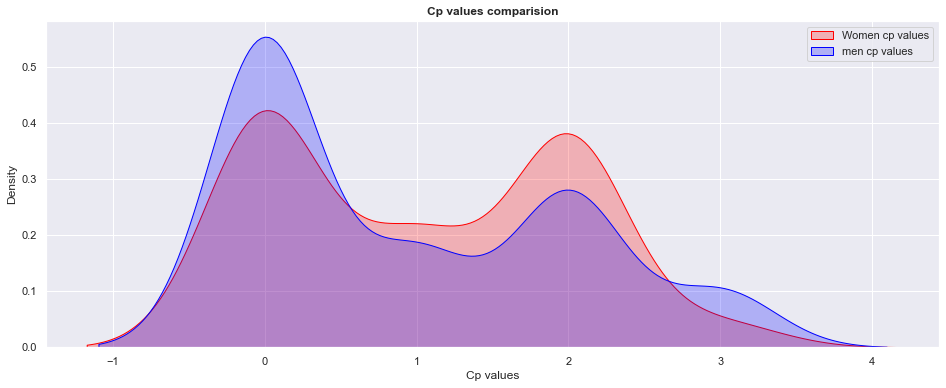

In [20]:
cp_density(women, men)

<ul>
    <li>This shows that most of the men's are free from heart-attacks.</li>
    <li>Both the genders show's spike for non-anginal pain. Women has the great tendency for non-anginal chest pain.</li>
</ul>

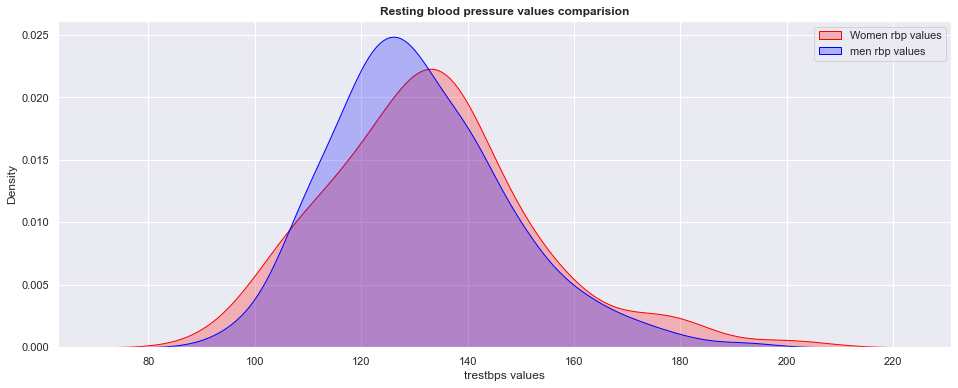

In [23]:
resting_blood_pressure_comparision(women, men)

<ul>
    <li>Men's Resting blood pressure values has the probable density of 120.</li>
    <li>Women's Resting blood pressure values has the probable density of 135.</li>
</ul>



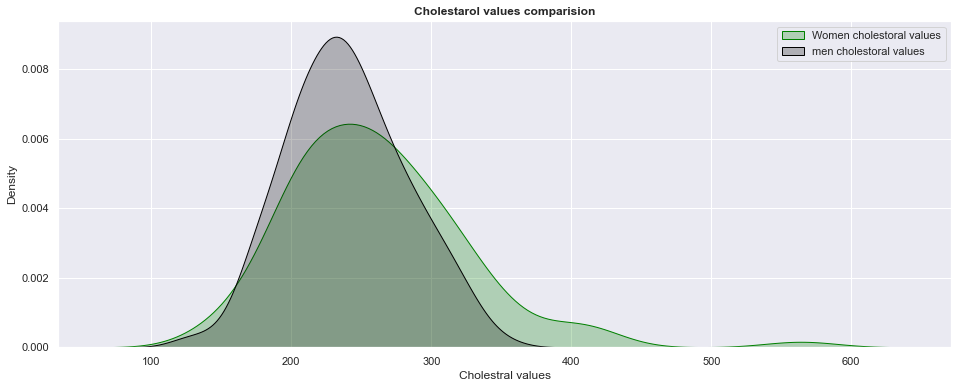

In [22]:
cholestarol(women, men)

<ul>
    <li>As we can see here that, cholestoral values of range 200 - 270 falls majorly under womens category.</li>
    <li>It's interesting that only the men's are showing values above 350.</li>
</ul>

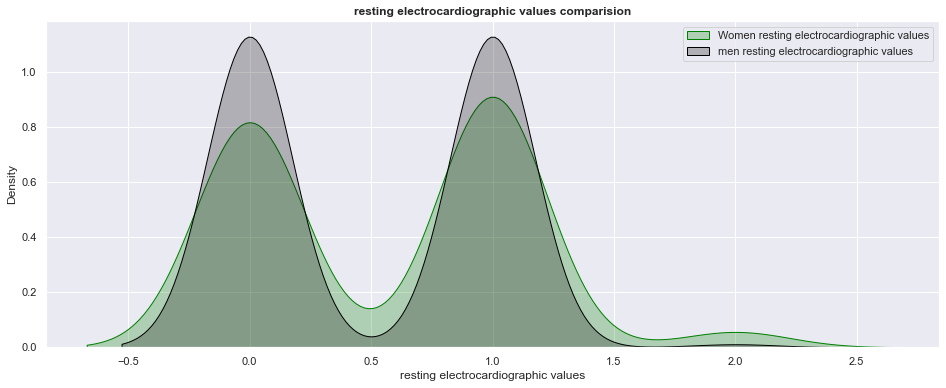

In [24]:
resting_electrocardiographic(women, men)

<ul>
    <li>Predominently women shows probable or definite left ventricular hypertrophy by Estes.</li>
</ul>

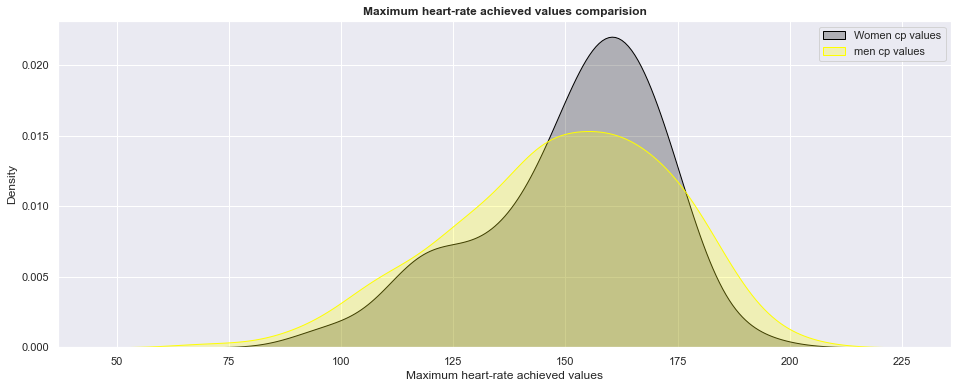

In [27]:
maximum_heartrate_achieved(women, men)

There are lot of women's who have achived maximum heart-rate than men.

<Figure size 720x720 with 0 Axes>

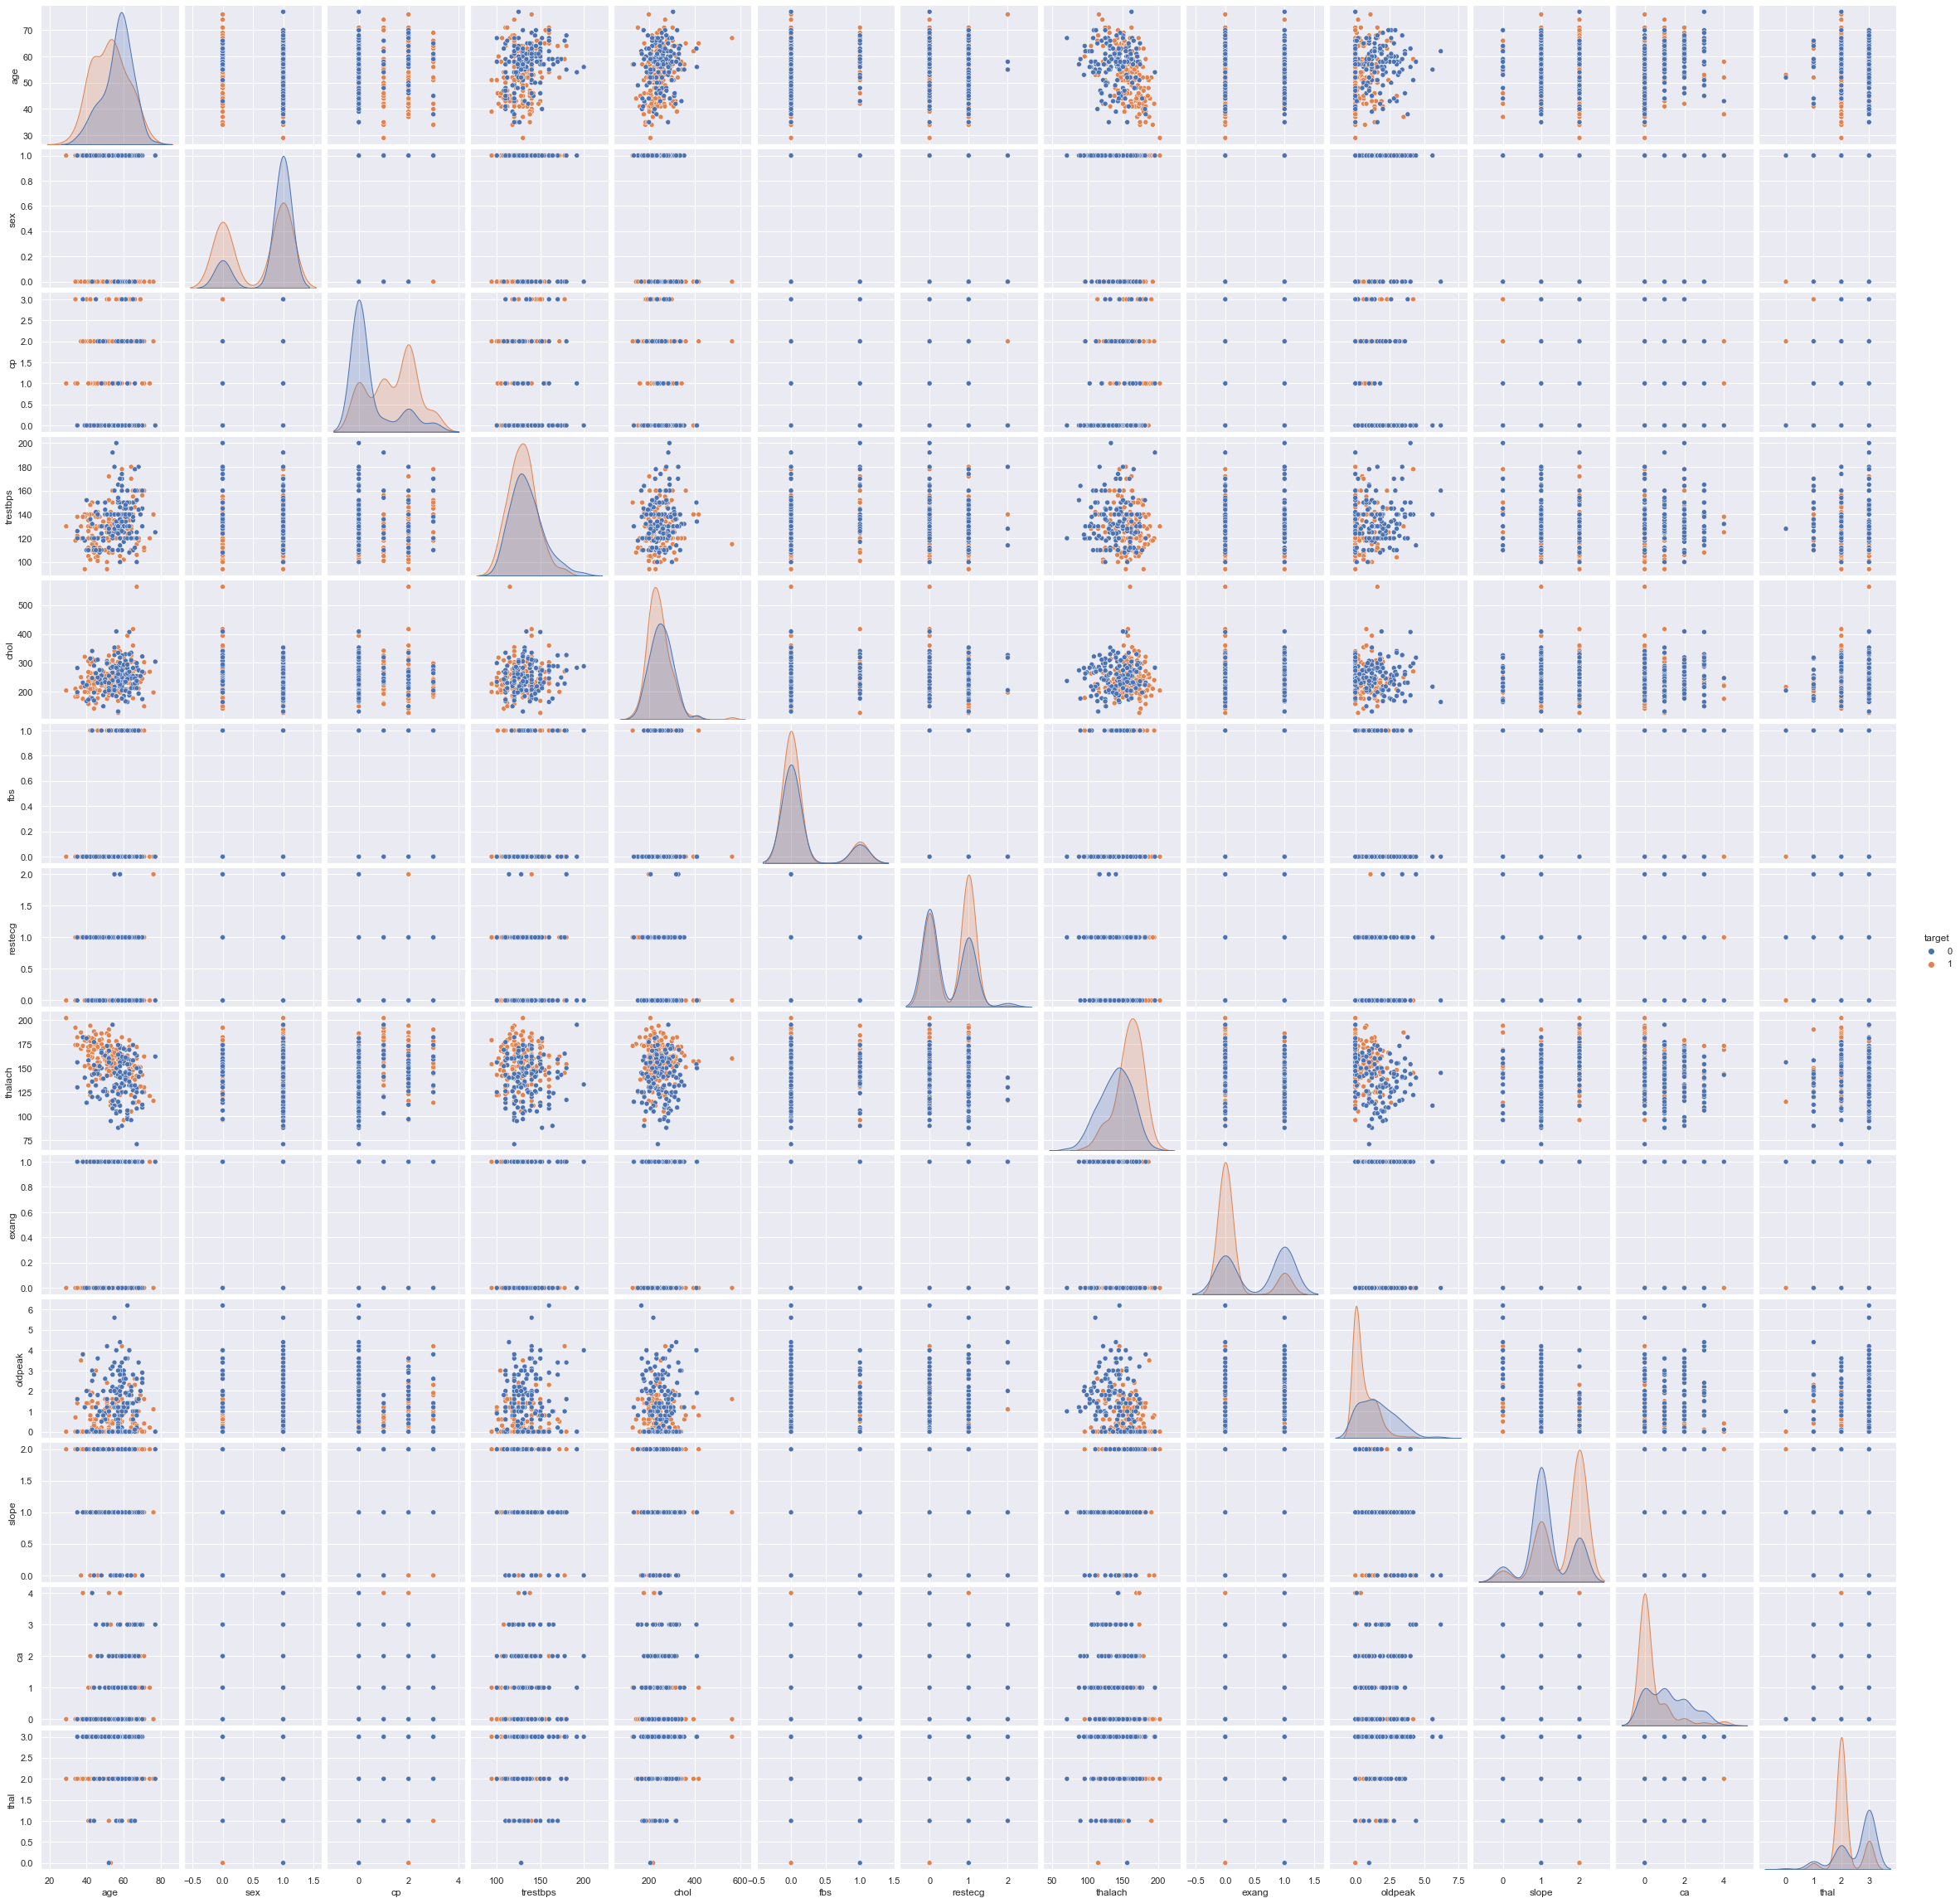

In [28]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue='target')

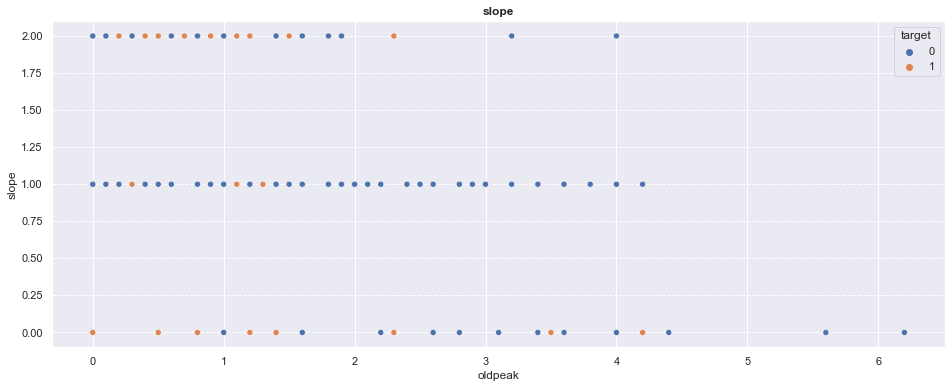

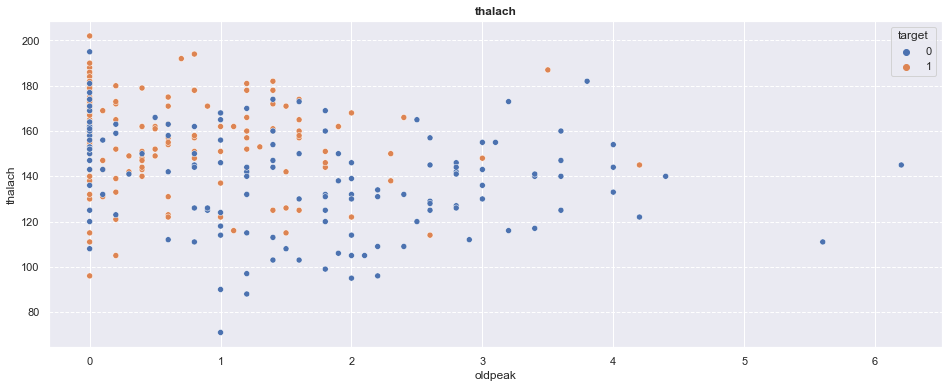

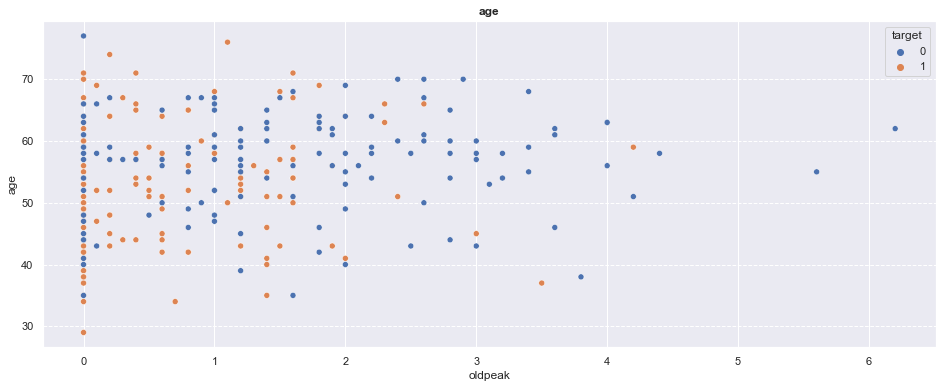

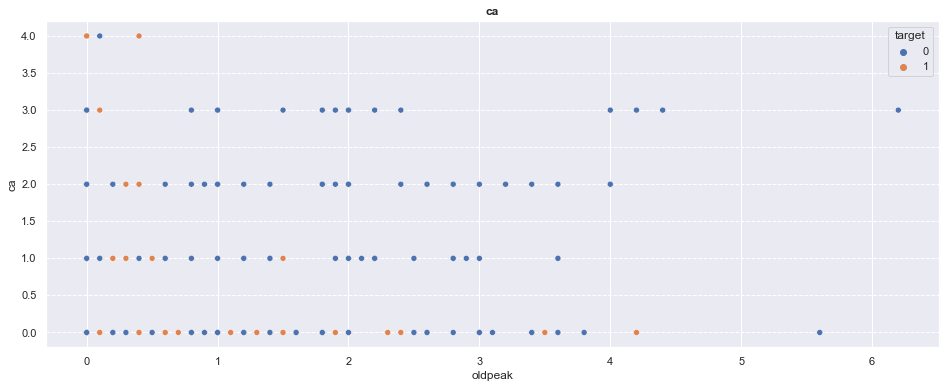

In [30]:
def eda_for_several_attributes(data):
    features = ['slope','thalach','age','ca']
    for var in features:
        plt.figure(figsize=(16,6))
        g = sns.scatterplot(data = data, x = 'oldpeak', y = data[var], hue = 'target')
        plt.title(var, weight='bold')
        plt.grid(linestyle = '--', axis = 'y')
        plt.show()
            
eda_for_several_attributes(df)

<ul>
<li>The less maximum heart-rate achieved the less chances of heart-attack.
</li>
<li>The slp value of 1 shows feable chances of heart-attack.</li>
</ul>

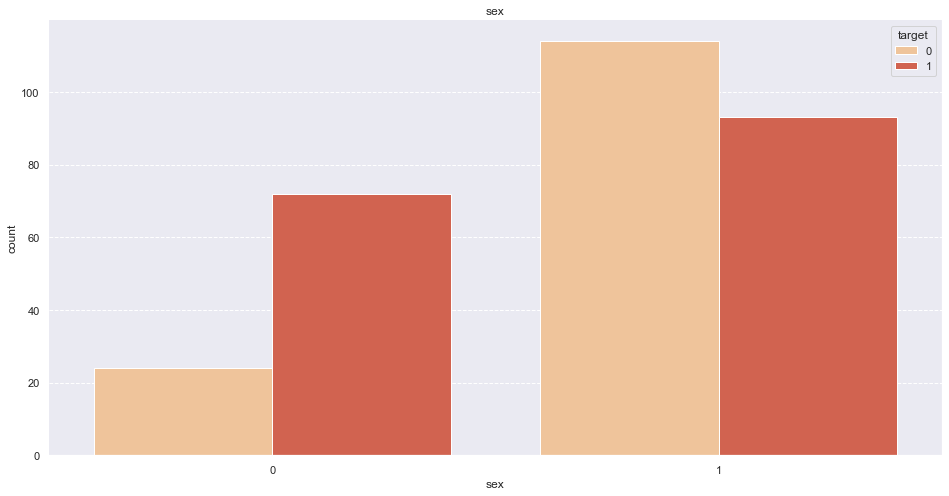

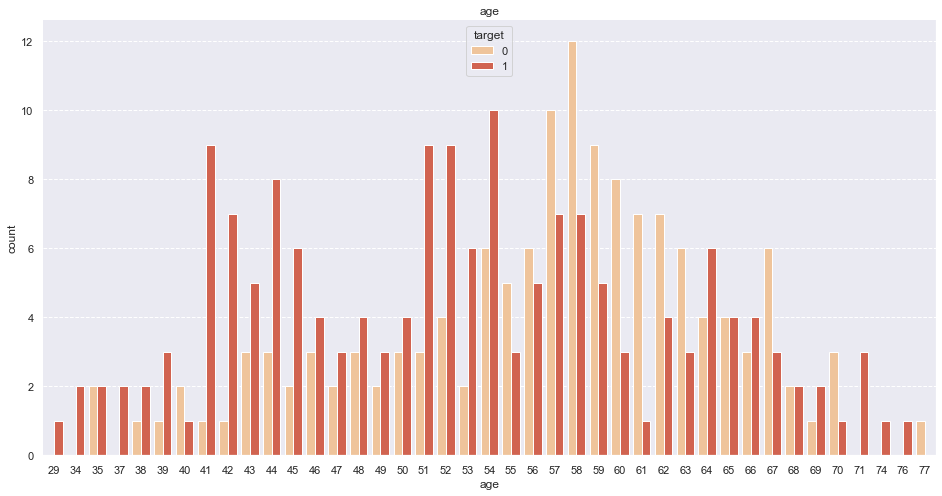

In [32]:
# check for the age and sex
def check_the_risk(data):
    for var in ['sex','age']:
        plt.figure(figsize=(16,8))
        g = sns.countplot(data=data, x = data[var], hue = data.target, palette='OrRd')
        plt.grid(linestyle = '--', axis='y')
        plt.title(var)
        
        for i in ['top','left']:
            g.spines[i].set_visible(False)
            
check_the_risk(df)

There is a spike in for heart-attack at the age of 41, 44, 51, 52,54.

# Data Preprocessing


In [33]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<ul>
    <li>No null or missing value.</li>
    <li>No outlier.</li>
    <li>Feature Engineering is not reuqire on this dataset.</li>
    <li>No feature transformation required.</li>
</ul>

# 4.	Data Preparation

Data Splitting

In [34]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [35]:
# Let's split the date into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [36]:
y_train.shape, y_test.shape

((242,), (61,))

# Model Building

In [39]:
# let's create a pipline 
pipeline = make_pipeline(RobustScaler()) # creating pipeline for model building

LR = make_pipeline(pipeline, LogisticRegression(random_state=0)) # LogisticRegression pipeline
DT = make_pipeline(pipeline, DecisionTreeClassifier(random_state=0)) # DecisionTree Classifier pipeline
RF = make_pipeline(pipeline, RandomForestClassifier(random_state=0)) # RandomForest Classifier pipeline
AC = make_pipeline(pipeline, AdaBoostClassifier(random_state=0)) # Adaboost Classifier pipeline
NB = make_pipeline(pipeline, GaussianNB()) # Naive bayes pipeline
KN = make_pipeline(pipeline, KNeighborsClassifier()) # KNeighbor pipeline
SV = make_pipeline(pipeline, SVC(random_state=0)) # Support vector pipeline

In [40]:
# creating model_dict
model_dictionary = {
    'Logistic_Regression':LR,
    'DecisionTree_Classifier':DT,
    'RandomForest_classifier':RF,
    'Adaboost_Classifier':AC,
    'Naivebayes_Classifier':NB,
    'KNeighbors_classifier':KN,
    'Support_Vector':SV
}

print(model_dictionary)

{'Logistic_Regression': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('logisticregression', LogisticRegression(random_state=0))]), 'DecisionTree_Classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))]), 'RandomForest_classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))]), 'Adaboost_Classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))]), 'Naivebayes_Classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                (

In [48]:
# define a function to fit the model and return it's accuracy, classification report and confusion matrix
def model_fitting(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model is: {}%'.format(accuracy_score(y_test, y_pred)* 100))
    print('-----'*20)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Selecting the best model

In [49]:
for name, model in model_dictionary.items():
    print('---'*10)
    print(name)
    model_fitting(model)

------------------------------
Logistic_Regression
The accuracy score of the model is: 83.60655737704919%
----------------------------------------------------------------------------------------------------
[[21  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

------------------------------
DecisionTree_Classifier
The accuracy score of the model is: 78.68852459016394%
----------------------------------------------------------------------------------------------------
[[22  5]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61

As we can see:<br/><br/>

Ada boost has got 90% accuracy with only 6 misclassified classes. It' has a precision of 0.86 for classes 0 and 0.94 for classes 1, which is better than all other algorithms. <b> Let's use Adaboost Model</b>

In [51]:
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
#model.save("heart_attack.h5")

AdaBoostClassifier(random_state=0)

In [52]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9016393442622951

# Confusion matrix

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



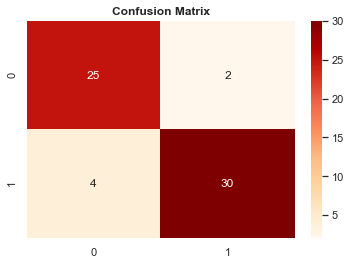

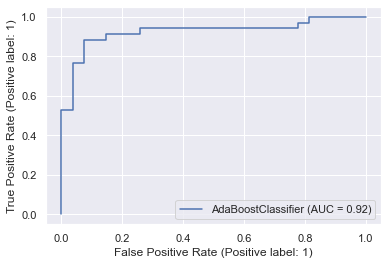

In [53]:
def find_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='OrRd')
    plt.title('Confusion Matrix', weight='bold')
    print(classification_report(y_test, y_pred))
    plot_roc_curve(model, X_test, y_test)
    
    
find_confusion_matrix(y_test, y_pred)

# Accuracy

In [54]:
print('The accuracy of the model is: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

The accuracy of the model is: 90.16%
